In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
import seaborn as sns
import scipy.stats as stats
from scipy.stats.mstats import winsorize
from sqlalchemy import create_engine
import warnings
postgres_user = 'dsbc_student'
postgres_pw = '7*.8G9QH21'
postgres_host = '142.93.121.174'
postgres_port = '5432'
postgres_db = 'studentsperformance'

In [2]:

engine2 = create_engine('postgresql://{}:{}@{}:{}/{}'.format(
    postgres_user, postgres_pw, postgres_host, postgres_port, postgres_db))

student_df = pd.read_sql_query('select * from studentsperformance',con=engine2)

In [3]:
student_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [17]:
student_df.describe()
student_df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [16]:
#check if any nulls
for column in student_df.columns:
    print( f"count in {column} is {student_df[column].count()}")

count in gender is 1000
count in race/ethnicity is 1000
count in parental level of education is 1000
count in lunch is 1000
count in test preparation course is 1000
count in math score is 1000
count in reading score is 1000
count in writing score is 1000


In [20]:
# no nulls in dataset :) divide by gender and plot
mdf = student_df[student_df['gender'] =='male']
fdf = student_df[student_df['gender'] !='male']
print('male records',len(mdf))
print('female records',len(fdf))

male records 482
female records 518


In [29]:
def plot_map(score):
 plt.hist(mdf[[score]], alpha = .5 , label="male") 
 plt.hist(fdf[[score]], alpha = .5, label="female")
 plt.title(f'average score in {score} by gender')
 plt.legend(loc='upper left')
 plt.show()

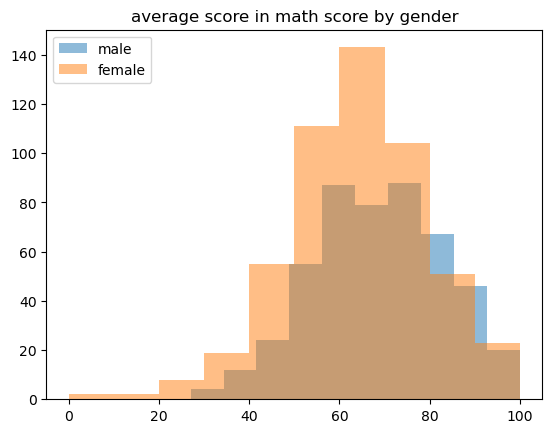

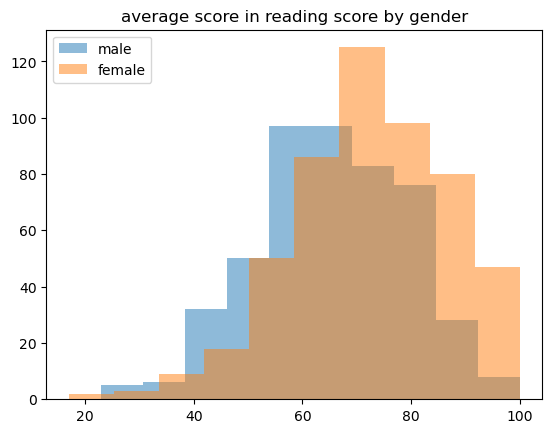

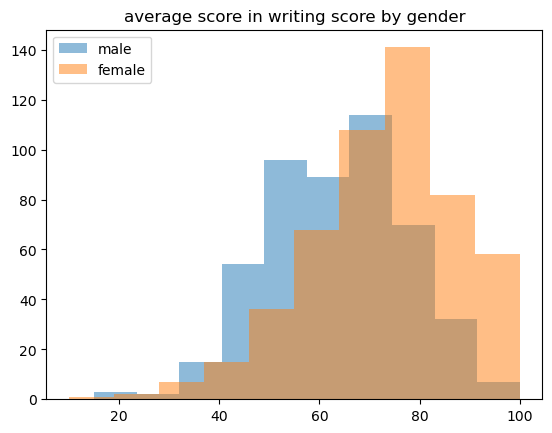

In [30]:
scores=('math score','reading score','writing score')
for score in scores:
    plot_map(score)

In [32]:

for score in scores:
    print("t-test between groups male  and female: {}".format(score))
    print(stats.ttest_ind(
                mdf[[score]], 
                fdf[[score]]
            ))

t-test between groups male  and female: math score
TtestResult(statistic=array([5.38324587]), pvalue=array([9.12018555e-08]), df=array([998.]))
t-test between groups male  and female: reading score
TtestResult(statistic=array([-7.95930801]), pvalue=array([4.68053874e-15]), df=array([998.]))
t-test between groups male  and female: writing score
TtestResult(statistic=array([-9.97955791]), pvalue=array([2.01987771e-22]), df=array([998.]))
